In [1]:
import numpy as np
from keras import backend as K
import os
import sys

!pip install import_ipynb
import import_ipynb

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
your_module = drive.CreateFile({'id':'1m2vfqms0pwvz-kDxi76kQ-TUG8vydmMd'})
your_module.GetContentFile('VGG16BidirectionalLSTM.ipynb')

from VGG16BidirectionalLSTM import VGG16BidirectionalLSTMVideoClassifier

Using TensorFlow backend.


importing Jupyter notebook from VGG16BidirectionalLSTM.ipynb
importing Jupyter notebook from VGGFeatureExtractor.ipynb


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
K.set_image_data_format('channels_first')





data_set_name = 'UCF-101'
input_dir_path = 'drive/My Drive/Action/Dataset/train'
output_dir_path = 'drive/My Drive/Action/Models'

np.random.seed(42)



classifier = VGG16BidirectionalLSTMVideoClassifier()

history = classifier.fit(data_dir_path=input_dir_path, model_dir_path=output_dir_path, data_set_name=data_set_name)














Extracting frames from video:  drive/My Drive/Action/Dataset/train/BabyCrawling/v_BabyCrawling_g18_c03.avi
Extracting frames from video:  drive/My Drive/Action/Dataset/train/BabyCrawling/v_BabyCrawling_g12_c02.avi
Extracting frames from video:  drive/My Drive/Action/Dataset/train/BabyCrawling/v_BabyCrawling_g17_c05.avi
Extracting frames from video:  drive/My Drive/Action/Dataset/train/BabyCrawling/v_BabyCrawling_g18_c05.avi
Extracting frames from video:  drive/My Drive/Action/Dataset/train/BabyCrawling/v_BabyCrawling_g08_c04.avi
Extracting frames from video:  drive/My Drive/Action/Dataset/train/BabyCrawling/v_BabyCrawling_g21_c02.avi
Extracting frames from video:  drive/My Drive/Action/Dataset/train/BabyCrawling/v_BabyCrawling_g15_c02.avi
Extracting frames from video:  drive/My Drive/Action/Dataset/train/BabyCrawling/v_BabyCrawling_g09_c03.avi
Extracting frames from video:  drive/My Drive/Action/Dataset/train/BabyCrawling/v_BabyCrawling_g16_c05.avi
Extracting frames from vi

In [0]:
import json
with open('drive/My Drive/Action/Models/VGG16BiLSTMhistory.json', 'w') as f:
    json.dump(str(history.history), f)

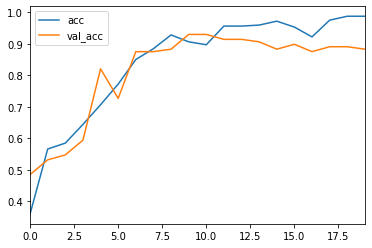

In [5]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df[['acc', 'val_acc']].plot()

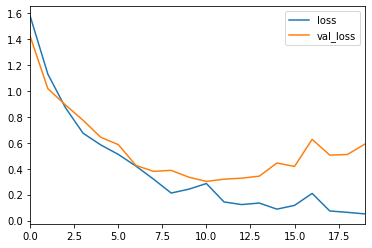

In [6]:
history_df[['loss', 'val_loss']].plot()